In [1]:
!unzip kagglecatsanddogs_5340.zip


Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import os
from PIL import Image


In [3]:
def remove_bad_images(path):
    for folder in ["Cat","Dog"]:
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path)
                img.verify()
            except:
                os.remove(file_path)

remove_bad_images("PetImages")


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150,150),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150,150),
    batch_size=32
)


Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [7]:
train_ds = train_ds.take(200)
val_ds = val_ds.take(50)


In [8]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x,y: (normalization_layer(x), y))


In [9]:
model = keras.Sequential([
    layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128,3,activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.5320 - loss: 0.7032 - val_accuracy: 0.6144 - val_loss: 0.6369
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.6367 - loss: 0.6346 - val_accuracy: 0.7131 - val_loss: 0.5692
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.7004 - loss: 0.5642 - val_accuracy: 0.7069 - val_loss: 0.5581
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.7504 - loss: 0.5059 - val_accuracy: 0.7450 - val_loss: 0.5213
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.7921 - loss: 0.4497 - val_accuracy: 0.7650 - val_loss: 0.5079


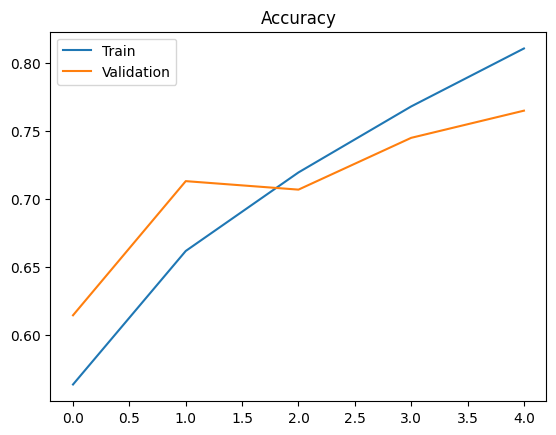

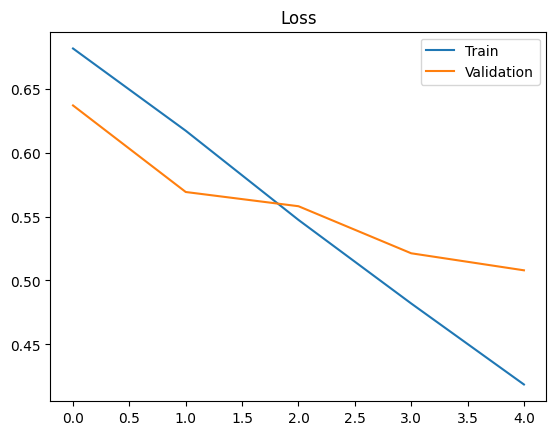

In [12]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Validation'])
plt.title("Loss")
plt.show()


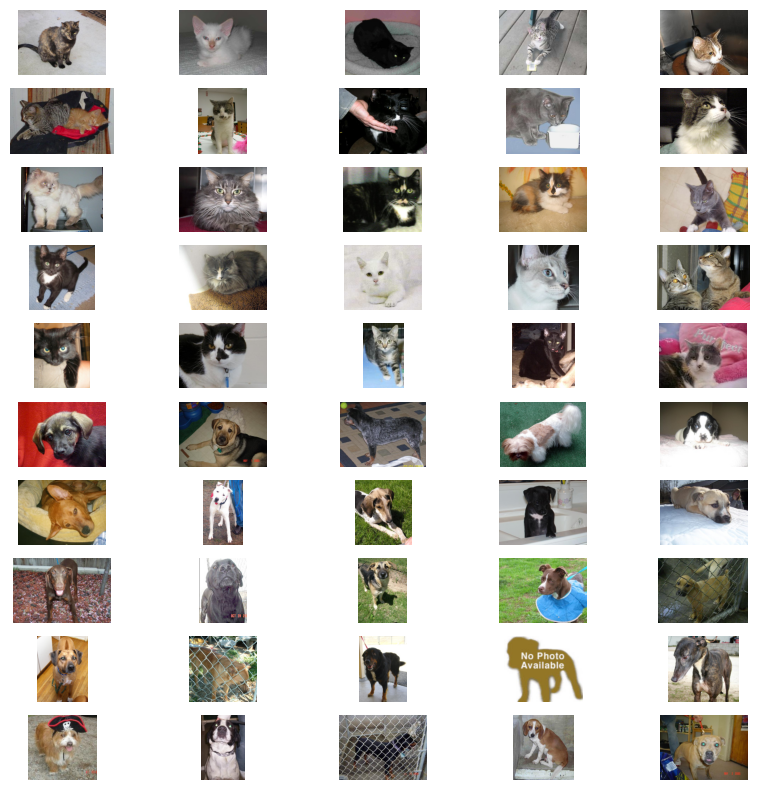

In [20]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

cat_path = "PetImages/Cat"
dog_path = "PetImages/Dog"

cats = [os.path.join(cat_path, f) for f in os.listdir(cat_path)]
dogs = [os.path.join(dog_path, f) for f in os.listdir(dog_path)]

sample = random.sample(cats, 25) + random.sample(dogs, 25)

plt.figure(figsize=(10,10))

for i, img_path in enumerate(sample):
    img = Image.open(img_path)
    plt.subplot(10,5,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()
